### Libraries and Packages

In [1]:
# Basics
import pandas as pd
import numpy as np
import time as tm
import math
# For Exploratory Data Analysis (EDA)
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [2]:
header = ["date","time","flow","anomaly"]
df = pd.read_csv('Barreiro2018.csv', sep=';', names=header)
holidays = pd.read_csv('Holidays.csv',sep=';')
#df

#### Municipal Holiday

In [3]:
newdate = ['28/06/2018']
holidays.loc[766]= newdate

#### Transformations and New columns

In [4]:
# Join columns date and time
df['datetime'] = df['date'] + ' ' + df['time']
df

,date,time,flow,anomaly,datetime
0,01/01/2018,00:07:30,18.333067,0,01/01/2018 00:07:30
1,01/01/2018,00:22:30,18.333067,0,01/01/2018 00:22:30
2,01/01/2018,00:37:30,19.784872,0,01/01/2018 00:37:30
3,01/01/2018,00:52:30,22.294744,0,01/01/2018 00:52:30
4,01/01/2018,01:07:30,27.229756,0,01/01/2018 01:07:30
...,...,...,...,...,...
35035,31/12/2018,22:52:30,24.792000,0,31/12/2018 22:52:30
35036,31/12/2018,23:07:30,23.029933,0,31/12/2018 23:07:30
35037,31/12/2018,23:22:30,20.415628,0,31/12/2018 23:22:30
35038,31/12/2018,23:37:30,22.019056,0,31/12/2018 23:37:30


In [5]:
# The strftime() method returns a string representing date and time using date, time or datetime object
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True).dt.strftime('%Y-%m-%d %H:%M:%S').astype(str)
# Visualize data
df

,date,time,flow,anomaly,datetime
0,01/01/2018,00:07:30,18.333067,0,2018-01-01 00:07:30
1,01/01/2018,00:22:30,18.333067,0,2018-01-01 00:22:30
2,01/01/2018,00:37:30,19.784872,0,2018-01-01 00:37:30
3,01/01/2018,00:52:30,22.294744,0,2018-01-01 00:52:30
4,01/01/2018,01:07:30,27.229756,0,2018-01-01 01:07:30
...,...,...,...,...,...
35035,31/12/2018,22:52:30,24.792000,0,2018-12-31 22:52:30
35036,31/12/2018,23:07:30,23.029933,0,2018-12-31 23:07:30
35037,31/12/2018,23:22:30,20.415628,0,2018-12-31 23:22:30
35038,31/12/2018,23:37:30,22.019056,0,2018-12-31 23:37:30


In [6]:
df['date'] = pd.to_datetime(df['date'])
holidays['date'] = pd.to_datetime(holidays['date'])

In [7]:
#0: mon, 1:tue, ..., 5:sat, 6:sun
df['dayofweek'] = pd.to_datetime(df['date'],dayfirst=True)
df['dayofweek'] = df['dayofweek'].dt.dayofweek

In [8]:
# if day is a holiday, then dayofweek is -1
df.loc[df.date.isin(holidays.date), 'dayofweek'] = -1

In [9]:
df['hour'] = pd.to_datetime(df['time'],dayfirst=True)
df['hour'] = df['hour'].dt.hour

In [10]:
df

,date,time,flow,anomaly,datetime,dayofweek,hour
0,2018-01-01,00:07:30,18.333067,0,2018-01-01 00:07:30,-1,0
1,2018-01-01,00:22:30,18.333067,0,2018-01-01 00:22:30,-1,0
2,2018-01-01,00:37:30,19.784872,0,2018-01-01 00:37:30,-1,0
3,2018-01-01,00:52:30,22.294744,0,2018-01-01 00:52:30,-1,0
4,2018-01-01,01:07:30,27.229756,0,2018-01-01 01:07:30,-1,1
...,...,...,...,...,...,...,...
35035,2018-12-31,22:52:30,24.792000,0,2018-12-31 22:52:30,0,22
35036,2018-12-31,23:07:30,23.029933,0,2018-12-31 23:07:30,0,23
35037,2018-12-31,23:22:30,20.415628,0,2018-12-31 23:22:30,0,23
35038,2018-12-31,23:37:30,22.019056,0,2018-12-31 23:37:30,0,23


In [11]:
df.dtypes

date         datetime64[ns]
time                 object
flow                float64
anomaly               int64
datetime             object
dayofweek             int64
hour                  int64
dtype: object

In [12]:
df['datetime'] = pd.DatetimeIndex(data=df['datetime'], dtype='datetime64[ns]', name='datetime', freq=None)

### Dataset for each type of day

In [13]:
#df_weekdays: contains data related to weekdays 
#df_sat: contains data related to saturdays
#df_sun: contains data related to sundays and holidays
df_weekdays = df[(df['dayofweek']>=0) & (df['dayofweek']<=4)]
df_sat = df[df['dayofweek']==5]
df_sun = df[(df['dayofweek']==-1) | (df['dayofweek']==6)]

In [14]:
df_weekdays

,date,time,flow,anomaly,datetime,dayofweek,hour
96,2018-02-01,00:07:30,15.008750,0,2018-01-02 00:07:30,3,0
97,2018-02-01,00:22:30,13.375950,0,2018-01-02 00:22:30,3,0
98,2018-02-01,00:37:30,12.083542,0,2018-01-02 00:37:30,3,0
99,2018-02-01,00:52:30,12.161200,0,2018-01-02 00:52:30,3,0
100,2018-02-01,01:07:30,25.701713,0,2018-01-02 01:07:30,3,1
...,...,...,...,...,...,...,...
35035,2018-12-31,22:52:30,24.792000,0,2018-12-31 22:52:30,0,22
35036,2018-12-31,23:07:30,23.029933,0,2018-12-31 23:07:30,0,23
35037,2018-12-31,23:22:30,20.415628,0,2018-12-31 23:22:30,0,23
35038,2018-12-31,23:37:30,22.019056,0,2018-12-31 23:37:30,0,23


### Average per hour

In [15]:
#df1 = df.resample('60min', on='datetime').mean()
#df1

# ATIVAR AQUI SE DER ERRO

,flow,anomaly,dayofweek,hour
datetime,,,,
2018-01-01 00:00:00,19.686438,0.0,-1.0,0.0
2018-01-01 01:00:00,26.438410,0.0,-1.0,1.0
2018-01-01 02:00:00,20.883749,0.0,-1.0,2.0
2018-01-01 03:00:00,17.249310,0.0,-1.0,3.0
2018-01-01 04:00:00,13.126283,0.0,-1.0,4.0
...,...,...,...,...
2018-12-31 19:00:00,35.008319,0.0,0.0,19.0
2018-12-31 20:00:00,24.399982,0.0,0.0,20.0
2018-12-31 21:00:00,22.056600,0.0,0.0,21.0


In [16]:
df1_weekdays = df_weekdays.resample('60min', on='datetime').mean()
df1_weekdays

,flow,anomaly,dayofweek,hour
datetime,,,,
2018-01-02 00:00:00,13.157360,0.0,3.0,0.0
2018-01-02 01:00:00,21.021677,0.0,3.0,1.0
2018-01-02 02:00:00,12.796942,0.0,3.0,2.0
2018-01-02 03:00:00,11.028467,0.0,3.0,3.0
2018-01-02 04:00:00,8.854193,0.0,3.0,4.0
...,...,...,...,...
2018-12-31 19:00:00,35.008319,0.0,0.0,19.0
2018-12-31 20:00:00,24.399982,0.0,0.0,20.0
2018-12-31 21:00:00,22.056600,0.0,0.0,21.0


In [17]:
df1_sat = df_sat.resample('60min', on='datetime').mean()
df1_sun = df_sun.resample('60min', on='datetime').mean()

### Average of all hours (every 00h,...)

In [18]:
#df1_weekdays['hour'] = df1_weekdays.index.hour

In [19]:
df1_weekdays

,flow,anomaly,dayofweek,hour
datetime,,,,
2018-01-02 00:00:00,13.157360,0.0,3.0,0.0
2018-01-02 01:00:00,21.021677,0.0,3.0,1.0
2018-01-02 02:00:00,12.796942,0.0,3.0,2.0
2018-01-02 03:00:00,11.028467,0.0,3.0,3.0
2018-01-02 04:00:00,8.854193,0.0,3.0,4.0
...,...,...,...,...
2018-12-31 19:00:00,35.008319,0.0,0.0,19.0
2018-12-31 20:00:00,24.399982,0.0,0.0,20.0
2018-12-31 21:00:00,22.056600,0.0,0.0,21.0


In [23]:
df_weekdays = df1_weekdays.groupby([df1_weekdays.index.hour]).mean() # df1_weekdays.index.year, 
df_weekdays

,flow,anomaly,dayofweek,hour
datetime,,,,
0,19.990154,0.004016,1.959839,0.0
1,17.432381,0.004016,1.959839,1.0
2,16.739304,0.004016,1.959839,2.0
3,17.162420,0.004016,1.959839,3.0
4,15.343411,0.008032,1.959839,4.0
5,19.758245,0.008032,1.959839,5.0
6,29.550517,0.008032,1.959839,6.0
7,41.494956,0.010040,1.959839,7.0
8,40.923127,0.008032,1.959839,8.0


In [24]:
df_sat = df1_sat.groupby([df1_sat.index.hour]).mean()
df_sun = df1_sun.groupby([df1_sun.index.hour]).mean()

In [ ]:
# df1_weekdays.between_time('00:00').head(50)
# meianoite= df1_weekdays[df1_weekdays['hour'].str.contains('^00.*')]

### Average hourly consumption

In [26]:
df = df.resample('60min', on='datetime').mean()
df = df.groupby([df.index.hour]).mean()

In [27]:
df

,flow,anomaly,dayofweek,hour
datetime,,,,
0,20.393449,0.002740,2.835616,0.0
1,17.918001,0.002740,2.835616,1.0
2,16.962365,0.002740,2.835616,2.0
3,17.383710,0.002740,2.835616,3.0
4,15.470131,0.005479,2.835616,4.0
5,19.635004,0.005479,2.835616,5.0
6,28.238845,0.005479,2.835616,6.0
7,38.390651,0.006849,2.835616,7.0
8,39.675400,0.005479,2.835616,8.0


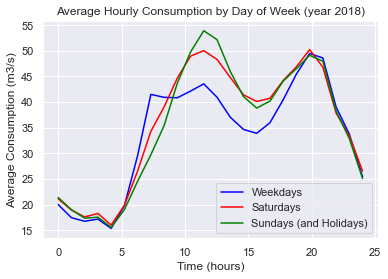

In [29]:
x = np.linspace(0,len(df),len(df))  
    
plt.plot(x, df_weekdays['flow'], label='Weekdays',color='blue')
plt.plot(x, df_sat['flow'], label='Saturdays',color='red')
plt.plot(x, df_sun['flow'], label='Sundays (and Holidays)',color='green')
plt.xlabel('Time (hours)')
plt.ylabel('Average Consumption (m3/s)')
plt.title('Average Hourly Consumption by Day of Week (year 2018)')
plt.legend()
plt.show()